<a href="https://colab.research.google.com/github/Knerdy-got-moves/Nanodiamond-band-structure-and-CV/blob/main/C_V_of_NV_CVD_HTHP_Diamond_and_Laser_heating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $C_V$ fitting from experimental data  
The following specification is given for the C_V calculation: The sample we used for this investigation was synthetic diamond (General Electric, USA) in the form of regularly shaped octahedral crystals of the $400–500 μm$ fraction. According to the manufacturer's data, the amount of metal impurities (the synthesis catalysts Mn + Ni) was < 1 wt %. Based on the chemical analysis for gas forming impurities, which was performed by the gas chromatography method, the sample contained < 0.001 wt % H, < 0.001 wt % N, and 0.15 wt % O. The mass of the calorimetric sample of diamond was 16.2333 g, with the calorimeter mass being 13.5192 g.


## Will this $C_V$ calculation hold for a CVD nanodiamond of 1 micron size (used as NV centre diamond in QGEM experimentm for test of quantum gravity)?







### 1. Size is irrelevant above sub-kelvin temperatures
The lattice heat capacity per mole or per volume is set by the phonon density of states and is
independent of object size unless the object becomes comparable to the dominant thermal
phonon wavelength. A simple estimate for the temperature at which the thermal wavelength
$\lambda_{\rm th}\sim v_s\,h/(k_B T)$ equals the characteristic size $d$ is
$$
T_\ast \;\approx\; \frac{h\,v_s}{k_B\,d}.
$$
For diamond, take $v_s \simeq 1.2\times10^4\ {\rm m\,s^{-1}}$, $h=6.626\times10^{-34}\ {\rm J\,s}$,
$k_B=1.380649\times10^{-23}\ {\rm J\,K^{-1}}$, and for a $d=1\,\mu{\rm m}=10^{-6}\,{\rm m}$ crystal,
$$
T_\ast \;\approx\; \frac{(6.626\times10^{-34})(1.2\times10^{4})}{(1.380649\times10^{-23})(10^{-6})}
\;\approx\; 0.58\ {\rm K}.
$$
All QGEM--relevant temperatures (few K to $300$\,K) are $\gg T_\ast$, so a $1\,\mu$m crystal is
\emph{bulk-like} for $C_V(T)$.

### 2. Surface vibrational terms are negligible at $1\mu$ m
The fraction of material in an outer shell of thickness $t$ on a sphere of radius $r$ is
$$
f_{\rm surf}\;\simeq\;\frac{V_{\rm shell}}{V_{\rm total}}
\;=\;\frac{4\pi r^2 t}{\tfrac{4}{3}\pi r^3}
\;=\;\frac{3t}{r}.
$$
Using $r=0.5\,\mu{\rm m}=5\times10^{-7}$\,m and a conservative vibrationally--perturbed layer
$t\simeq 0.2$\,nm $=2\times10^{-10}$\,m,
$$
f_{\rm surf}\;\simeq\;\frac{3\times 2\times10^{-10}}{5\times10^{-7}}
\;\approx\;1.2\times10^{-3}.
$$
Thus $\lesssim 0.12\%$ of the atoms are in the surface layer; even if surface C--H groups exist,
their added modes change $C_V$ by $\ll 1\%$ over $50$--$300$\,K. (This is very different from
true \emph{nanodiamonds} of a few nanometres.)

### 3. NV centres and impurities are too dilute to matter for $C_V$
A $1\,\mu$m diamond sphere has volume
$$
V=\frac{4\pi}{3}r^3=\frac{4\pi}{3}(5\times10^{-7})^3 \approx 5.24\times10^{-19}\ {\rm m^3}.
$$
With density $\rho=3520\ {\rm kg\,m^{-3}}$ and molar mass $M=0.012\ {\rm kg\,mol^{-1}}$,
$$
n_{\rm mol}=\frac{\rho V}{M}\approx \frac{3520\times 5.24\times10^{-19}}{0.012}
\approx 1.54\times10^{-13}\ {\rm mol},
$$
so the number of lattice sites is $N\approx n_{\rm mol}N_A\approx 9.3\times10^{10}$. A single NV
per particle corresponds to $\sim10^{-11}$ site fraction; ppm--level metals or $^{13}$C alter $C_V$
by $\ll 1\%$. The NV spin's Schottky anomaly (zero--field gap $\Delta/k_B\approx 0.138$\,K) matters
only near $0.1$\,K and is negligible at typical temperatures.


Saved:
 - diamond_cv_per_volume.csv
 - diamond_cv_per_volume_lowT_fit_params.csv

Debye Theta_D from cv_vol T^3 fit (60–100 K): 1944.6 K

Power-law fits cv_vol ≈ A_vol * T^n:
fit_range_K  n_exponent     SE_n  A_vol_prefactor_SI
       5-30    1.876873 0.007851            7.461925
      10-60    1.905119 0.029014            6.903243
      15-60    1.925532 0.040811            6.404534
      20-80    2.103404 0.076265            3.445766
     30-100    2.398916 0.096661            1.088009
     15-100    2.159804 0.075562            2.983707


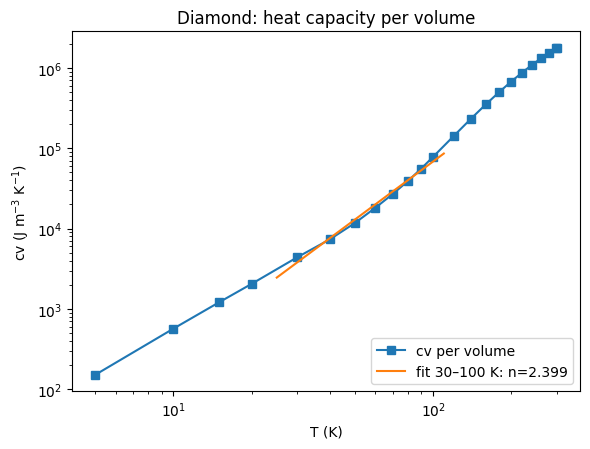

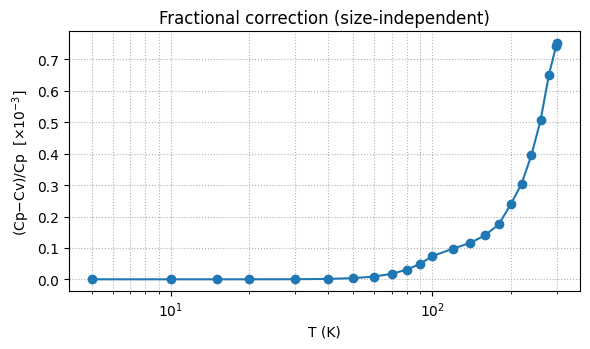

In [ ]:
# Diamond Cp -> Cv, then Cv per volume (J m^-3 K^-1)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1) Input: Cp(calculated) vs T (from your table)
#    Units: T in K, Cp in J mol^-1 K^-1
# -----------------------------
T_vals = np.array([
      5,   10,   15,   20,   30,   40,   50,   60,   70,   80,   90,  100,
    120,  140,  160,  180,  200,  220,  240,  260,  280, 298.15, 300
], dtype=float)

Cp_calc = np.array([
  5.17e-4, 0.00194, 0.00413, 0.00699, 0.0150, 0.0250, 0.0400, 0.0620,
  0.0920, 0.1330, 0.1900, 0.2660, 0.482, 0.794, 1.205, 1.710, 2.302,
  2.967, 3.692, 4.462, 5.262, 6.003, 6.079
], dtype=float)

# -----------------------------
# 2) Thermo parameters (bulk diamond)
#    α(T) anchors taken from your PDF; below 100 K we enforce α ~ T^3 anchored at 100 K.
#    Bulk modulus C_B and molar volume V_m
# -----------------------------
alpha_T_anchor = np.array([  60,   80,   100,   120,   140,   160,   180,   200,   220,   240,   260,   280, 298.15, 300.0 ])
alpha_a_anchor = np.array([0.05, 0.08,  0.12,  0.17,  0.22,  0.28,  0.35,  0.45,  0.55,  0.67,  0.80,  0.95,  1.05,   1.06 ]) * 1e-6

# α(T) model
k_low = alpha_a_anchor[np.where(alpha_T_anchor==100)[0][0]] / (100.0**3)
def alpha_of_T(T):
    T = np.asarray(T, float)
    a = np.zeros_like(T)
    below = T <= 100
    between = (T > 100) & (T <= alpha_T_anchor[-1])
    above = T > alpha_T_anchor[-1]
    a[below]   = k_low * T[below]**3
    a[between] = np.interp(T[between], alpha_T_anchor, alpha_a_anchor)
    a[above]   = alpha_a_anchor[-1]
    return a

alpha_vals = alpha_of_T(T_vals)

# bulk modulus (Pa) and molar volume (m^3/mol)
C_B  = 4.42e11                     # ~442 GPa
rho  = 3520.0                      # kg/m^3
Mmol = 0.012                       # kg/mol (12 g/mol)
V_m  = Mmol / rho                  # m^3/mol  ≈ 3.409e-6

# -----------------------------
# 3) Convert Cp -> Cv (molar) and then to per-volume
#    Δ = Cp - Cv = (3 α)^2 V_m C_B T
# -----------------------------
delta   = (3.0 * alpha_vals)**2 * V_m * C_B * T_vals
Cv_mol  = Cp_calc - delta                     # J mol^-1 K^-1
cv_vol  = Cv_mol / V_m                        # J m^-3 K^-1

# -----------------------------
# 4) Fits for cv_vol
#    (a) power law: cv_vol ≈ A_vol * T^n over several low-T ranges
#    (b) Debye T^3: cv_vol ≈ [(12π^4/5) R / V_m] * (T/Θ)^3  → Θ estimate
# -----------------------------
def power_fit(Tmin, Tmax, T=T_vals, Y=cv_vol):
    m = (T>=Tmin) & (T<=Tmax)
    x, y = np.log(T[m]), np.log(Y[m])
    A = np.vstack([x, np.ones_like(x)]).T
    n_hat, logA_hat = np.linalg.lstsq(A, y, rcond=None)[0]
    resid = y - (n_hat*x + logA_hat)
    dof   = max(1, len(x)-2)
    sigma2 = float((resid**2).sum()/dof)
    Sxx    = float(((x - x.mean())**2).sum())
    se_n   = float(np.sqrt(sigma2/Sxx))
    return n_hat, float(np.exp(logA_hat)), se_n

ranges = [(5,30),(10,60),(15,60),(20,80),(30,100),(15,100)]
fit_rows = []
for r in ranges:
    n_hat, A_hat, se_n = power_fit(*r)
    fit_rows.append({"fit_range_K": f"{r[0]}-{r[1]}",
                     "n_exponent": n_hat, "SE_n": se_n,
                     "A_vol_prefactor_SI": A_hat})  # units: J m^-3 K^-1 / K^n

# Debye T^3 coefficient and Θ_D (same Θ_D as from molar fit)
R = 8.314462618
K_vol = (12.0*np.pi**4/5.0) * (R / V_m)
m = (T_vals>=60) & (T_vals<=100)
T_ = T_vals[m]; cv_ = cv_vol[m]
A3_vol = float(((T_**3)*cv_).sum() / (T_**6).sum())
Theta_D_est = float((K_vol/A3_vol)**(1.0/3.0))

# -----------------------------
# 5) Save CSVs and print summaries
# -----------------------------
df = pd.DataFrame({
    "T_K": T_vals,
    "alpha_per_K": alpha_vals,
    "Cp_J_per_molK": Cp_calc,
    "delta_J_per_molK": delta,
    "Cv_molar_J_per_molK": Cv_mol,
    "cv_vol_J_per_m3K": cv_vol,
    "fractional_correction_(Cp-Cv)/Cp": np.where(Cp_calc>0, delta/Cp_calc, np.nan)
})
df_fits = pd.DataFrame(fit_rows)

df.to_csv("diamond_cv_per_volume.csv", index=False)
df_fits.to_csv("diamond_cv_per_volume_lowT_fit_params.csv", index=False)

print("Saved:")
print(" - diamond_cv_per_volume.csv")
print(" - diamond_cv_per_volume_lowT_fit_params.csv\n")
print("Debye Theta_D from cv_vol T^3 fit (60–100 K): {:.1f} K".format(Theta_D_est))
print("\nPower-law fits cv_vol ≈ A_vol * T^n:")
print(df_fits.to_string(index=False))

# -----------------------------
# 6) Plots
# -----------------------------
plt.figure(figsize=(6,4.6))
plt.loglog(T_vals, cv_vol, 's-', label="cv per volume")
# overlay the 30–100 K power fit
row = df_fits[df_fits["fit_range_K"]=="30-100"].iloc[0]
n_ = row["n_exponent"]; A_ = row["A_vol_prefactor_SI"]
Ts = np.linspace(25,110,200)
plt.loglog(Ts, A_ * Ts**n_, '-', label=f"fit 30–100 K: n={n_:.3f}")
plt.xlabel("T (K)"); plt.ylabel("cv (J m$^{-3}$ K$^{-1}$)")
plt.title("Diamond: heat capacity per volume")
plt.legend(loc="lower right"); plt.tight_layout(); plt.show()

plt.figure(figsize=(6,3.6))
plt.semilogx(T_vals, 1e3*df["fractional_correction_(Cp-Cv)/Cp"].values, 'o-')
plt.xlabel("T (K)"); plt.ylabel(r"(Cp−Cv)/Cp  [×10$^{-3}$]")
plt.title("Fractional correction (size-independent)")
plt.grid(True, which="both", ls=":")
plt.tight_layout(); plt.show()


# Calculation of heating in the nanodiaond due to laser

Laser heating: 3.7548 microW
NANOSPHERE LASER HEATING ANALYSIS
Epsilon (laser): (5.7+0.001j)
Epsilon term: (0.6103896169608768+5.059875104404198e-05j)
Imaginary part: 0.000051
Laser heating coefficient: 8.96e-19
✓ Laser heating term is active

STARTING PLOT GENERATION
Generating Plot 1: T vs P for different T₀


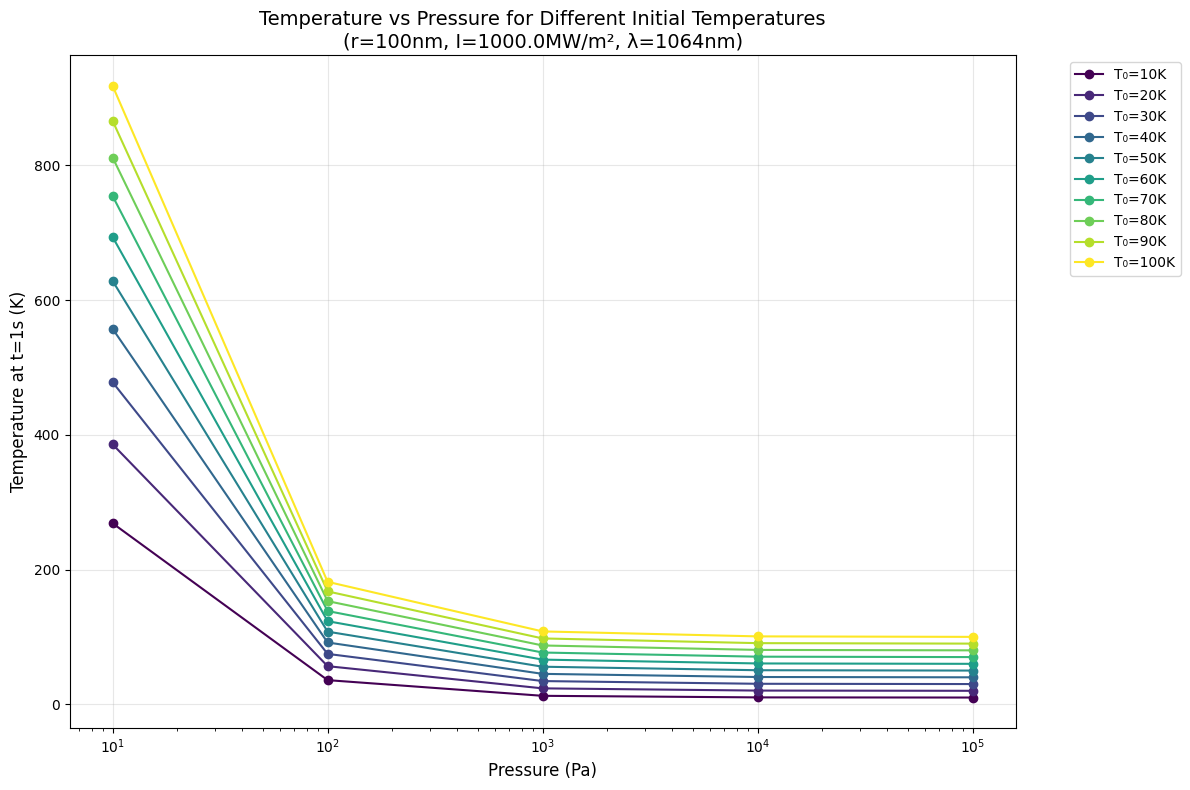

Generating Plot 2: Wavelength-Intensity Contour


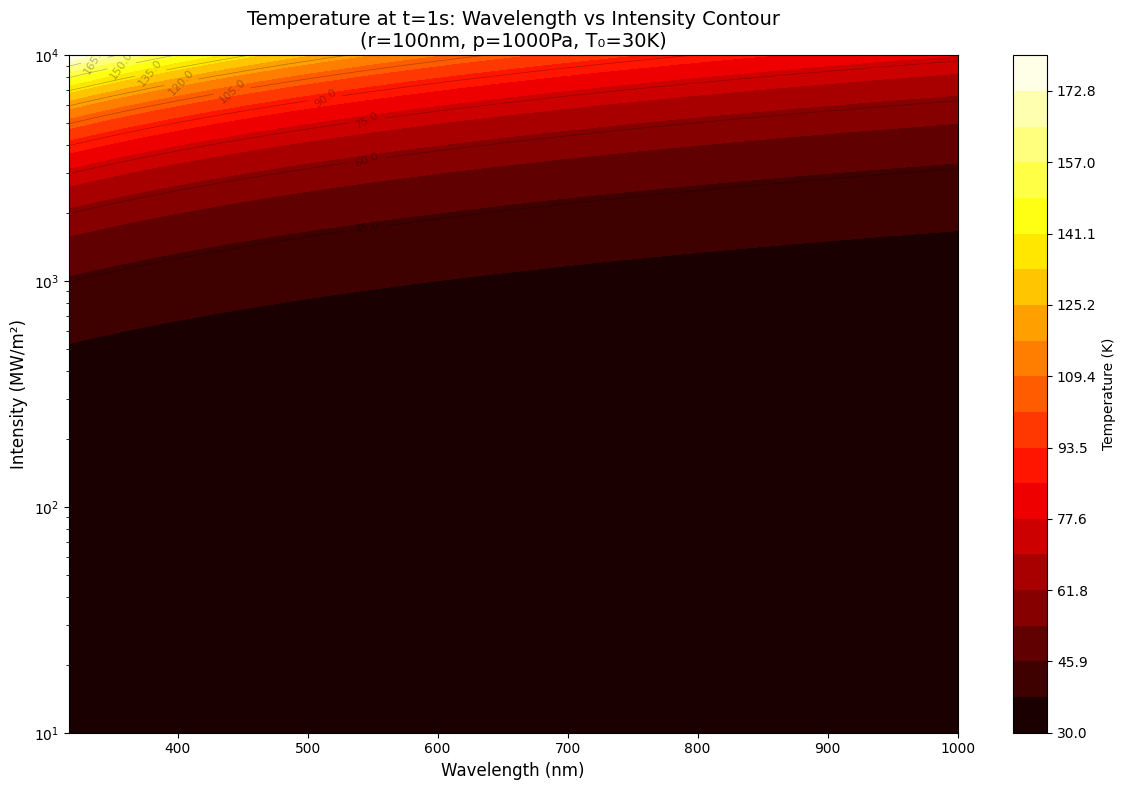

Generating Plot 3: Blackbody Radiation Analysis


<Figure size 1200x1200 with 0 Axes>

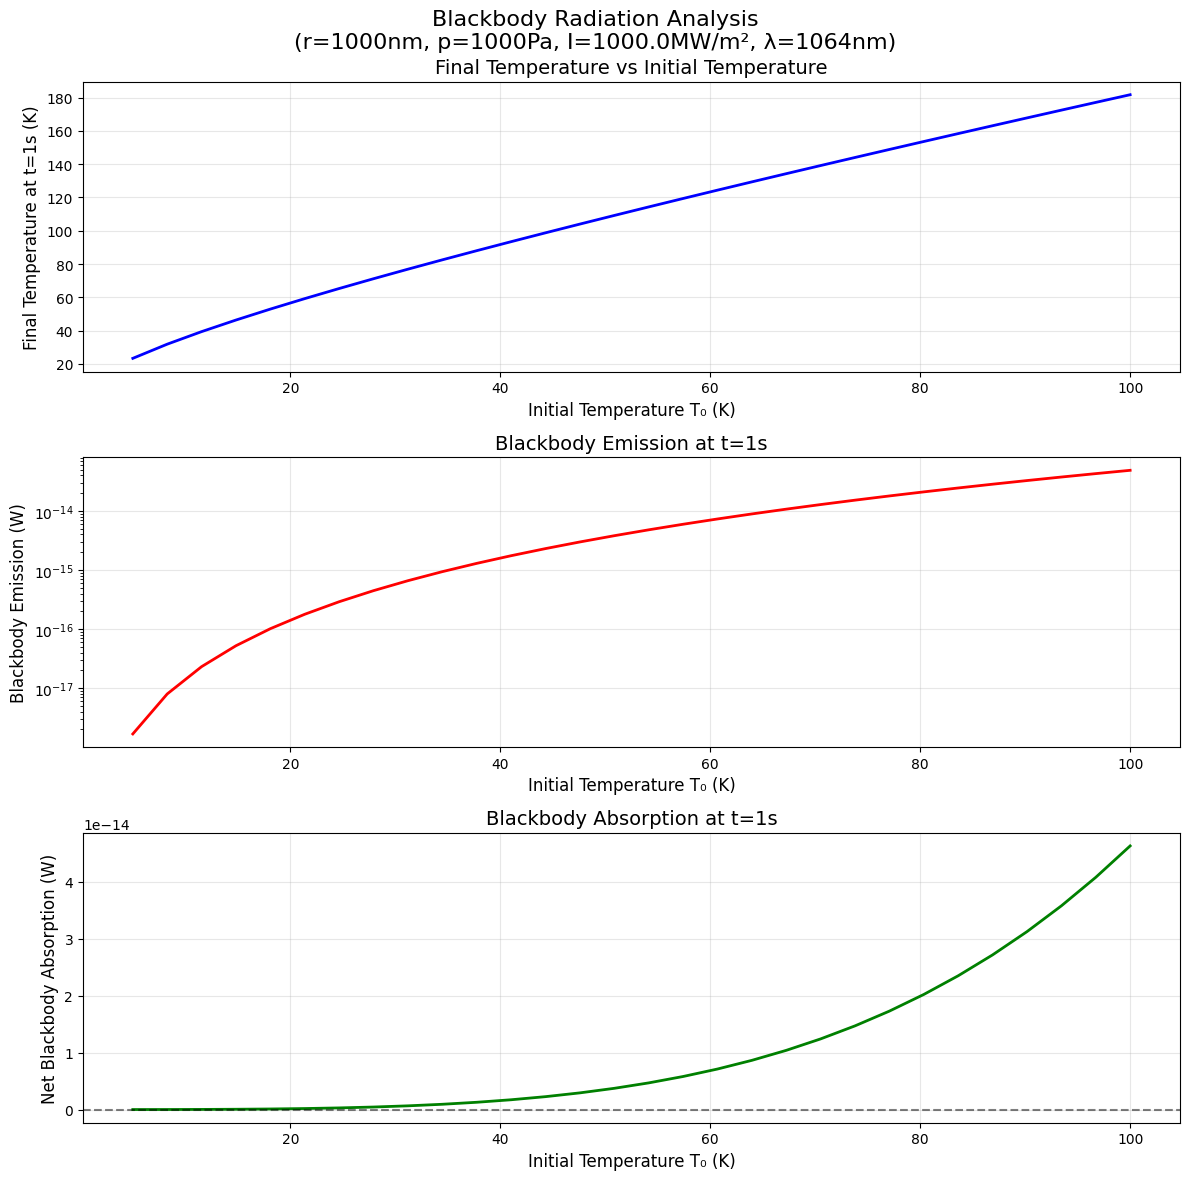

Generating Plot 4: Particle Size Effects


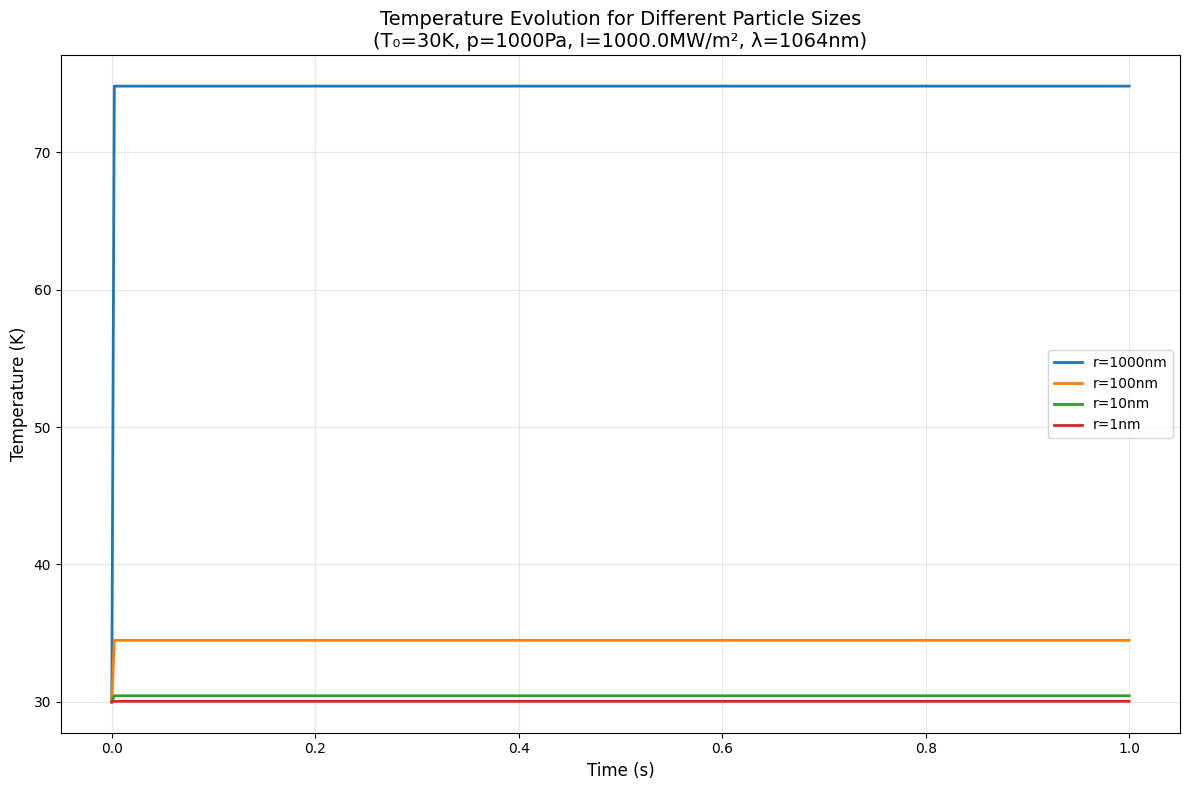


✓ ANALYSIS COMPLETE!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from multiprocessing import Pool
import warnings
warnings.filterwarnings('ignore')

# Constants
c = 3.00e8  # Speed of light (m/s)
hbar = 1.05e-34  # Reduced Planck constant (J·s)
k_B = 1.38e-23  # Boltzmann constant (J/K)
zeta_5 = 1.04  # Riemann zeta function at 5
I = 1e9 # W/m^2
wavelength = 1064e-9
k = 2 * np.pi / wavelength
r=1e-6
V = (4/3) * np.pi * r**3
# For laser wavelength, epsilon should be complex for absorption
# Using typical values for diamond at optical frequencies
epsilon_laser = 5.7 + 1e-3j  # Small imaginary part for laser absorption

# For blackbody radiation
epsilon_bb_real = 5.7
epsilon_bb_imag =1e-3
epsilon_bb = epsilon_bb_real + 1j * epsilon_bb_imag

p_0 = 1e5  # Atmospheric pressure (Pa)
alpha_g = 0.9  # Accommodation coefficient
epsilon_term_laser = (epsilon_laser - 1) / (epsilon_laser + 2)
laser_heating = 3 * I * k * V * np.imag(epsilon_term_laser)  # W
print(f"Laser heating: {laser_heating*1e6:.4f} microW")

# Heat capacity parameters for different temperature ranges
cv_params = {
    (5, 30): {'n': 1.75, 'A': 7.461925},
    (10, 60): {'n': 1.905119, 'A': 6.903243},
    (15, 60): {'n': 1.925532, 'A': 6.404534},
    (20, 80): {'n': 2.103404, 'A': 3.445766},
    (30, 100): {'n': 2.398916, 'A': 1.088009},
    (15, 100): {'n': 2.159804, 'A': 2.983707}
}

def get_cv(T):
    """Get specific heat capacity at constant volume based on temperature"""
    # Find appropriate range for the temperature
    for (T_min, T_max), params in cv_params.items():
        if T_min <= T <= T_max:
            return params['A'] * T**params['n']

    # If outside all ranges, use the broadest range
    if T < 5:
        params = cv_params[(5, 30)]
    else:
        params = cv_params[(15, 100)]
    return params['A'] * T**params['n']

def calculate_mean_speed(T):
    """Calculate mean speed of air molecules"""
    m_air = 4.8e-26  # Mass of air molecule (kg)
    return np.sqrt(8 * k_B * T / (np.pi * m_air))

def heating_equation(t, y, I, wavelength, r, p, T_0):
    """
    Differential equation for temperature evolution
    y[0] = T (temperature)
    """
    T = max(y[0], 1e-10)  # Prevent negative temperatures

    # Calculate volume
    V = (4/3) * np.pi * r**3

    # Wave number
    k = 2 * np.pi / wavelength

    # Get heat capacity
    C_V = get_cv(T)

    # Mean speed of molecules at background temperature
    v_bar = calculate_mean_speed(T_0)

    # Number density at T_0
    N_0 = p_0 / (k_B * T_0)

    # Three terms in the heating equation
    # 1. Laser heating term (now properly uses complex epsilon)
    epsilon_term = (epsilon_laser - 1) / (epsilon_laser + 2)
    laser_heating = 3 * I * k * V * np.imag(epsilon_term)

    # 2. Gas cooling term
    gas_cooling = 6 * alpha_g * np.pi * r**2 * v_bar * N_0 * (p/p_0) * k_B * (T - T_0)

    # 3. Blackbody radiation term
    bb_factor = (72 * zeta_5 * V) / (np.pi**2 * c**3 * hbar**4)
    bb_epsilon_term = np.imag((epsilon_bb - 1) / (epsilon_bb + 2))
    bb_radiation = bb_factor * bb_epsilon_term * k_B**5 * T**5

    # Temperature derivative
    dT_dt = (laser_heating - gas_cooling - bb_radiation) / (V * C_V)

    return [dT_dt]

def solve_temperature_evolution(I, wavelength, r, p, T_0, t_final=1.0,
                                return_trajectory=False, n_points=250,
                                method='BDF', T_min=1e-6, T_max=5000.0):
    """
    Solve dT/dt with a stiff solver. If return_trajectory=False (default),
    we only sample at t_final (much faster for parameter scans).
    """

    # Precompute constants that don't depend on T
    V = (4/3) * np.pi * r**3
    k = 2 * np.pi / wavelength
    epsilon_term_laser = (epsilon_laser - 1) / (epsilon_laser + 2)
    laser_heating = 3 * I * k * V * np.imag(epsilon_term_laser)  # W

    v_bar = calculate_mean_speed(T_0)
    N_0 = p_0 / (k_B * T_0)
    gas_coeff = 6 * alpha_g * np.pi * r**2 * v_bar * N_0 * (p/p_0) * k_B  # W/K

    bb_prefac = (72 * zeta_5 * V) / (np.pi**2 * c**3 * hbar**4)
    bb_epsilon_term = np.imag((epsilon_bb - 1) / (epsilon_bb + 2))
    bb_const = bb_prefac * bb_epsilon_term * k_B**5  # W / K^5

    def rhs(t, y):
        # Clip T to avoid negative or runaway values during transients
        T = float(np.clip(y[0], T_min, T_max))

        # Specific heat (J/K) per volume factor is C_V(T); total heat capacity is V*C_V
        C_V = get_cv(T)

        # Net power in Watts
        P_net = laser_heating - gas_coeff * (T - T_0) - bb_const * T**5

        # dT/dt
        return [P_net / (V * C_V)]

    # Sampling strategy
    if return_trajectory:
        t_eval = np.linspace(0.0, t_final, int(n_points))
    else:
        t_eval = np.array([t_final])  # only need the endpoint

    sol = solve_ivp(rhs, (0.0, t_final), [T_0],
                    method=method, t_eval=t_eval,
                    rtol=1e-6, atol=1e-8)

    return sol.t, sol.y[0]

# Plot 1: T vs p at t=1s for different T_0
def plot_T_vs_p():
    plt.figure(figsize=(12, 8))

    pressures = [10, 100, 1000, 1e4, 1e5]  # Pa
    T_0_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # K
    r = 1e-7  # 100 nm radius
    I = 1e9  # W/m^2 (moderate laser intensity)
    wavelength = 1064e-9  # 532 nm (green laser)

    colors = plt.cm.viridis(np.linspace(0, 1, len(T_0_values)))

    for idx, T_0 in enumerate(T_0_values):
        T_final_values = []
        for p in pressures:
            _, T_evolution = solve_temperature_evolution(I, wavelength, r, p, T_0)
            T_final_values.append(T_evolution[-1])

        plt.semilogx(pressures, T_final_values, 'o-',
                    color=colors[idx], label=f'T₀={T_0}K')

    plt.xlabel('Pressure (Pa)', fontsize=12)
    plt.ylabel('Temperature at t=1s (K)', fontsize=12)
    plt.title('Temperature vs Pressure for Different Initial Temperatures\n' +
              f'(r={r*1e9:.0f}nm, I={I/1e6:.1f}MW/m², λ={wavelength*1e9:.0f}nm)',
              fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
    plt.tight_layout()
    plt.show()

# Plot 2: Contour plot of T vs wavelength and intensity
def plot_T_contour():
    plt.figure(figsize=(12, 8))

    # Reduced grid resolution for faster computation
    wavelengths = np.logspace(-6, -6.5, 20)  # Reduced from 50 to 20
    intensities = np.logspace(7, 10, 20)    # Reduced from 50 to 20

    r = 1e-7  # 100 nm radius
    p = 1000  # Pa
    T_0 = 30  # K

    T_grid = np.zeros((len(intensities), len(wavelengths)))

    for i, I in enumerate(intensities):
        for j, wavelength in enumerate(wavelengths):
            _, T_evolution = solve_temperature_evolution(I, wavelength, r, p, T_0)
            T_grid[i, j] = T_evolution[-1]

    # Create contour plot with interpolation for smoothness
    X, Y = np.meshgrid(wavelengths * 1e9, intensities / 1e6)
    levels = np.linspace(np.min(T_grid), np.max(T_grid), 20)

    contour = plt.contourf(X, Y, T_grid, levels=levels, cmap='hot')
    plt.colorbar(contour, label='Temperature (K)')

    # Add contour lines
    contour_lines = plt.contour(X, Y, T_grid, levels=10, colors='black',
                                alpha=0.3, linewidths=0.5)
    plt.clabel(contour_lines, inline=True, fontsize=8, fmt='%.1f')

    plt.xlabel('Wavelength (nm)', fontsize=12)
    plt.ylabel('Intensity (MW/m²)', fontsize=12)
    plt.yscale('log')
    plt.title(f'Temperature at t=1s: Wavelength vs Intensity Contour\n' +
              f'(r={r*1e9:.0f}nm, p={p}Pa, T₀={T_0}K)', fontsize=14)
    plt.tight_layout()
    plt.show()

# Plot 3: Blackbody emission and absorption vs T_0
def plot_blackbody_emission_absorption():
    plt.figure(figsize=(12, 12))

    # Use fewer points for faster computation
    T_0_values = np.linspace(5, 100, 30)  # Reduced from 50 to 30
    r = 1e-6  # 100 nm radius
    V = (4/3) * np.pi * r**3
    p = 1000  # Pa
    I = 1e9 # W/m^2
    wavelength = 1064e-9  # 532 nm
    epsilon_term_laser = (epsilon_laser - 1) / (epsilon_laser + 2)
    bb_factor = (72 * zeta_5 * V) / (np.pi**2 * c**3 * hbar**4)
    bb_epsilon_term = np.imag((epsilon_bb - 1) / (epsilon_bb + 2))

    emissions = []
    absorptions = []
    T_final_values = []

    for idx, T_0 in enumerate(T_0_values):
        _, T_evolution = solve_temperature_evolution(I, wavelength, r, p, T_0)
        T_final = T_evolution[-1]
        T_final_values.append(T_final)

        # Calculate emission and absorption
        emission = bb_factor * bb_epsilon_term * k_B**5 * T_final**5
        absorption = bb_factor * bb_epsilon_term * k_B**5 * (T_final**5 - T_0**5)

        emissions.append(emission)
        absorptions.append(absorption)

    # Create subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))

    # Plot 1: Final temperature
    ax1.plot(T_0_values, T_final_values, 'b-', linewidth=2)
    ax1.set_xlabel('Initial Temperature T₀ (K)', fontsize=12)
    ax1.set_ylabel('Final Temperature at t=1s (K)', fontsize=12)
    ax1.set_title('Final Temperature vs Initial Temperature', fontsize=14)
    ax1.grid(True, alpha=0.3)

    # Plot 2: Blackbody emission
    ax2.semilogy(T_0_values, emissions, 'r-', linewidth=2)
    ax2.set_xlabel('Initial Temperature T₀ (K)', fontsize=12)
    ax2.set_ylabel('Blackbody Emission (W)', fontsize=12)
    ax2.set_title('Blackbody Emission at t=1s', fontsize=14)
    ax2.grid(True, alpha=0.3)

    # Plot 3: Blackbody absorption (net)
    ax3.plot(T_0_values, np.array(absorptions), 'g-', linewidth=2)
    ax3.set_xlabel('Initial Temperature T₀ (K)', fontsize=12)
    ax3.set_ylabel('Net Blackbody Absorption (W)', fontsize=12)
    ax3.set_title('Blackbody Absorption at t=1s', fontsize=14)
    ax3.grid(True, alpha=0.3)
    ax3.axhline(y=0, color='k', linestyle='--', alpha=0.5)

    plt.suptitle(f'Blackbody Radiation Analysis\n(r={r*1e9:.0f}nm, p={p}Pa, I={I/1e6:.1f}MW/m², λ={wavelength*1e9:.0f}nm)',
                 fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot 4: Effect of particle size
def plot_size_effect():
    plt.figure(figsize=(12, 8))

    radii = [1e-6, 1e-7, 1e-8, 1e-9]  # Different radii
    T_0 = 30  # K
    p = 1000  # Pa
    I = 1e9  # W/m^2
    wavelength = 1064e-9  # 1064 nm

    for r in radii:
        t, T_evolution = solve_temperature_evolution(
            I, wavelength, r, p, T_0,
            t_final=1.0,
            return_trajectory=True,   # <-- ask for the full trajectory here
            n_points=400,             # a smooth curve
            method='BDF'              # stiff solver
        )
        plt.plot(t, T_evolution, linewidth=2, label=f'r={r*1e9:.0f}nm')

    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Temperature (K)', fontsize=12)
    plt.title(f'Temperature Evolution for Different Particle Sizes\n'
              f'(T₀={T_0}K, p={p}Pa, I={I/1e6:.1f}MW/m², λ={wavelength*1e9:.0f}nm)',
              fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Quick test function to verify physics
def test_physics():
    """Quick test to verify the laser heating term is non-zero"""
    print("\n=== Physics Check ===")
    wavelength = 532e-9
    k = 2 * np.pi / wavelength
    epsilon_term = (epsilon_laser - 1) / (epsilon_laser + 2)
    print(f"Epsilon (laser): {epsilon_laser}")
    print(f"Epsilon term: {epsilon_term}")
    print(f"Imaginary part: {np.imag(epsilon_term):.6f}")
    print(f"Laser heating coefficient (3kV*Im(ε)): {3 * k * 1e-21 * np.imag(epsilon_term):.2e}")

    if np.imag(epsilon_term) == 0:
        print("WARNING: Laser heating is zero! Check epsilon values.")
    else:
        print("✓ Laser heating term is active")
    print("=" * 30 + "\n")

# Main execution
if __name__ == "__main__":
    print("=" * 70)
    print("NANOSPHERE LASER HEATING ANALYSIS")
    print("=" * 70)

    # Run physics check
    epsilon_term = (epsilon_laser - 1) / (epsilon_laser + 2)
    print(f"Epsilon (laser): {epsilon_laser}")
    print(f"Epsilon term: {epsilon_term}")
    print(f"Imaginary part: {np.imag(epsilon_term):.6f}")
    wavelength = 1064e-9
    k = 2 * np.pi / wavelength
    print(f"Laser heating coefficient: {3 * k * 1e-21 * np.imag(epsilon_term):.2e}")

    if np.imag(epsilon_term) == 0:
        print("⚠️  WARNING: Laser heating is zero! Check epsilon values.")
    else:
        print("✓ Laser heating term is active")

    print("\n" + "=" * 70)
    print("STARTING PLOT GENERATION")
    print("=" * 70)

    # Generate all plots
    print("Generating Plot 1: T vs P for different T₀")
    plot_T_vs_p()

    print("Generating Plot 2: Wavelength-Intensity Contour")
    plot_T_contour()

    print("Generating Plot 3: Blackbody Radiation Analysis")
    plot_blackbody_emission_absorption()

    print("Generating Plot 4: Particle Size Effects")
    plot_size_effect()

    print("\n" + "=" * 70)
    print("✓ ANALYSIS COMPLETE!")
    print("=" * 70)